In [1]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
assets=['AAPL','MSFT','TSLA','MMM']

In [3]:
df=yf.download('AAL',start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,47.279999,47.340000,46.139999,46.299999,44.741226,6737800
2017-01-04,46.630001,47.439999,46.349998,46.700001,45.127754,5859600
2017-01-05,46.520000,46.930000,45.610001,45.889999,44.345032,6825300
2017-01-06,45.849998,46.720001,45.470001,46.209999,44.654255,7260200
2017-01-09,46.009998,47.340000,45.779999,47.080002,45.494976,4739100
...,...,...,...,...,...,...
2023-02-14,16.490000,16.850000,16.330000,16.790001,16.790001,17467900
2023-02-15,16.639999,16.840000,16.580000,16.799999,16.799999,12470200
2023-02-16,16.590000,16.670000,16.360001,16.389999,16.389999,15054700


In [5]:
window=25

In [6]:
test_df=df[:window]

In [7]:
test_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,47.279999,47.340000,46.139999,46.299999,44.741226,6737800
2017-01-04,46.630001,47.439999,46.349998,46.700001,45.127754,5859600
2017-01-05,46.520000,46.930000,45.610001,45.889999,44.345032,6825300
2017-01-06,45.849998,46.720001,45.470001,46.209999,44.654255,7260200
2017-01-09,46.009998,47.340000,45.779999,47.080002,45.494976,4739100
2017-01-10,47.000000,48.509998,46.970001,48.480000,46.847836,7483800
2017-01-11,49.290001,49.900002,48.099998,48.639999,47.002449,6925800
2017-01-12,48.669998,49.000000,46.840000,48.099998,46.480625,5447300
2017-01-13,48.160000,48.430000,47.540001,47.650002,46.045776,3541700


In [8]:
test_df.shape

(25, 6)

In [9]:
y_=test_df.Close
y_

Date
2017-01-03    46.299999
2017-01-04    46.700001
2017-01-05    45.889999
2017-01-06    46.209999
2017-01-09    47.080002
2017-01-10    48.480000
2017-01-11    48.639999
2017-01-12    48.099998
2017-01-13    47.650002
2017-01-17    46.750000
2017-01-18    47.639999
2017-01-19    47.259998
2017-01-20    48.000000
2017-01-23    46.939999
2017-01-24    47.540001
2017-01-25    47.910000
2017-01-26    49.590000
2017-01-27    46.950001
2017-01-30    44.900002
2017-01-31    44.250000
2017-02-01    44.049999
2017-02-02    44.009998
2017-02-03    44.200001
2017-02-06    45.299999
2017-02-07    45.169998
Name: Close, dtype: float64

In [10]:
range(len(test_df.index))

range(0, 25)

In [11]:
pd.Series

pandas.core.series.Series

In [12]:
pd.Series(range(len(test_df.index))).values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [13]:
x_=pd.Series(range(len(test_df.index))).values

In [14]:
model_=sm.OLS(y_,sm.add_constant(x_)).fit()

In [15]:
model_.params

const    47.884831
x1       -0.105369
dtype: float64

In [16]:
 75.230253+0*0.224854

75.230253

In [17]:
 75.230253+24*0.224854

80.626749

In [18]:
model_.predict()

array([47.88483072, 47.77946148, 47.67409223, 47.56872299, 47.46335374,
       47.3579845 , 47.25261525, 47.14724601, 47.04187676, 46.93650752,
       46.83113827, 46.72576903, 46.62039978, 46.51503054, 46.40966129,
       46.30429205, 46.1989228 , 46.09355355, 45.98818431, 45.88281506,
       45.77744582, 45.67207657, 45.56670733, 45.46133808, 45.35596884])

In [19]:
model_.predict()[-1]

45.35596883920521

In [20]:
df.shape

(1544, 6)

In [21]:
df[24:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-07,45.750000,46.130001,45.009998,45.169998,43.649265,6120000
2017-02-08,45.259998,45.259998,44.509998,45.060001,43.542973,4329900
2017-02-09,45.070000,46.599998,44.939999,46.299999,44.840740,7089900
2017-02-10,46.619999,46.700001,46.169998,46.450001,44.986012,4040600
2017-02-13,46.560001,47.779999,46.500000,47.410000,45.915756,6158600
...,...,...,...,...,...,...
2023-02-14,16.490000,16.850000,16.330000,16.790001,16.790001,17467900
2023-02-15,16.639999,16.840000,16.580000,16.799999,16.799999,12470200
2023-02-16,16.590000,16.670000,16.360001,16.389999,16.389999,15054700


In [22]:
df[0:24]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,47.279999,47.340000,46.139999,46.299999,44.741226,6737800
2017-01-04,46.630001,47.439999,46.349998,46.700001,45.127754,5859600
2017-01-05,46.520000,46.930000,45.610001,45.889999,44.345032,6825300
2017-01-06,45.849998,46.720001,45.470001,46.209999,44.654255,7260200
2017-01-09,46.009998,47.340000,45.779999,47.080002,45.494976,4739100
2017-01-10,47.000000,48.509998,46.970001,48.480000,46.847836,7483800
2017-01-11,49.290001,49.900002,48.099998,48.639999,47.002449,6925800
2017-01-12,48.669998,49.000000,46.840000,48.099998,46.480625,5447300
2017-01-13,48.160000,48.430000,47.540001,47.650002,46.045776,3541700


In [23]:
lsma_arr=[]
dates_arr=[]

In [24]:
for i in range(len(df)-24):
    input_reg=df[i:25+i]
    x=pd.Series(range(len(input_reg.index))).values
    y=input_reg.Close
    model=sm.OLS(y,sm.add_constant(x)).fit()
    pred=model.predict()[-1]
    lsma_arr.append(pred)
    dates_arr.append(input_reg.iloc[-1].name)

In [25]:
lsma_df=pd.DataFrame({'LSMA':lsma_arr},index=dates_arr)
lsma_df

,LSMA
2017-02-07,45.355969
2017-02-08,45.095077
2017-02-09,45.064584
2017-02-10,44.995600
2017-02-13,45.091784
...,...
2023-02-14,16.824739
2023-02-15,16.768215
2023-02-16,16.647015
2023-02-17,16.630800


In [26]:
all_df=pd.concat([lsma_df,df],axis=1)

In [27]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume
2017-01-03,NaN,47.279999,47.340000,46.139999,46.299999,44.741226,6737800
2017-01-04,NaN,46.630001,47.439999,46.349998,46.700001,45.127754,5859600
2017-01-05,NaN,46.520000,46.930000,45.610001,45.889999,44.345032,6825300
2017-01-06,NaN,45.849998,46.720001,45.470001,46.209999,44.654255,7260200
2017-01-09,NaN,46.009998,47.340000,45.779999,47.080002,45.494976,4739100
...,...,...,...,...,...,...,...
2023-02-14,16.824739,16.490000,16.850000,16.330000,16.790001,16.790001,17467900
2023-02-15,16.768215,16.639999,16.840000,16.580000,16.799999,16.799999,12470200
2023-02-16,16.647015,16.590000,16.670000,16.360001,16.389999,16.389999,15054700
2023-02-17,16.630800,16.379999,16.559999,16.150000,16.360001,16.360001,21876800


In [28]:
all_df.dropna(inplace=True)
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume
2017-02-07,45.355969,45.750000,46.130001,45.009998,45.169998,43.649265,6120000
2017-02-08,45.095077,45.259998,45.259998,44.509998,45.060001,43.542973,4329900
2017-02-09,45.064584,45.070000,46.599998,44.939999,46.299999,44.840740,7089900
2017-02-10,44.995600,46.619999,46.700001,46.169998,46.450001,44.986012,4040600
2017-02-13,45.091784,46.560001,47.779999,46.500000,47.410000,45.915756,6158600
...,...,...,...,...,...,...,...
2023-02-14,16.824739,16.490000,16.850000,16.330000,16.790001,16.790001,17467900
2023-02-15,16.768215,16.639999,16.840000,16.580000,16.799999,16.799999,12470200
2023-02-16,16.647015,16.590000,16.670000,16.360001,16.389999,16.389999,15054700
2023-02-17,16.630800,16.379999,16.559999,16.150000,16.360001,16.360001,21876800


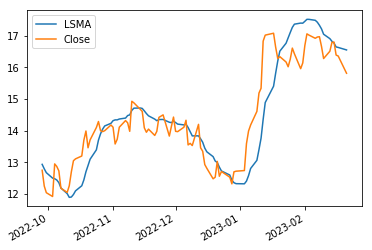

In [29]:
all_df[['LSMA','Close']][-100:].plot()

In [30]:
all_df['signal_buy']=all_df.Close<all_df.LSMA
all_df['signal_sell']=all_df.Close>all_df.LSMA

In [31]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell
2017-02-07,45.355969,45.750000,46.130001,45.009998,45.169998,43.649265,6120000,True,False
2017-02-08,45.095077,45.259998,45.259998,44.509998,45.060001,43.542973,4329900,True,False
2017-02-09,45.064584,45.070000,46.599998,44.939999,46.299999,44.840740,7089900,False,True
2017-02-10,44.995600,46.619999,46.700001,46.169998,46.450001,44.986012,4040600,False,True
2017-02-13,45.091784,46.560001,47.779999,46.500000,47.410000,45.915756,6158600,False,True
...,...,...,...,...,...,...,...,...,...
2023-02-14,16.824739,16.490000,16.850000,16.330000,16.790001,16.790001,17467900,True,False
2023-02-15,16.768215,16.639999,16.840000,16.580000,16.799999,16.799999,12470200,False,True
2023-02-16,16.647015,16.590000,16.670000,16.360001,16.389999,16.389999,15054700,True,False
2023-02-17,16.630800,16.379999,16.559999,16.150000,16.360001,16.360001,21876800,True,False


In [32]:
all_df['shifted_open']=all_df.Open.shift(-1)

In [33]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell,shifted_open
2017-02-07,45.355969,45.750000,46.130001,45.009998,45.169998,43.649265,6120000,True,False,45.259998
2017-02-08,45.095077,45.259998,45.259998,44.509998,45.060001,43.542973,4329900,True,False,45.070000
2017-02-09,45.064584,45.070000,46.599998,44.939999,46.299999,44.840740,7089900,False,True,46.619999
2017-02-10,44.995600,46.619999,46.700001,46.169998,46.450001,44.986012,4040600,False,True,46.560001
2017-02-13,45.091784,46.560001,47.779999,46.500000,47.410000,45.915756,6158600,False,True,47.259998
...,...,...,...,...,...,...,...,...,...,...
2023-02-14,16.824739,16.490000,16.850000,16.330000,16.790001,16.790001,17467900,True,False,16.639999
2023-02-15,16.768215,16.639999,16.840000,16.580000,16.799999,16.799999,12470200,False,True,16.590000
2023-02-16,16.647015,16.590000,16.670000,16.360001,16.389999,16.389999,15054700,True,False,16.379999
2023-02-17,16.630800,16.379999,16.559999,16.150000,16.360001,16.360001,21876800,True,False,16.059999


In [34]:
in_position=False
buydates,selldates=[],[]
buyprices,sellprices=[],[]

In [35]:
for index,row in all_df.iterrows():
    if not in_position and row.signal_buy==True:
        buyprice=row.shifted_open
        #print(buyprice)
        buyprices.append(buyprice)
        buydates.append(index)
        in_position=True
    if in_position and row.signal_sell==True:
        sellprice=row.shifted_open
        sellprices.append(sellprice)
        selldates.append(index)
        in_position=False
    

In [36]:
[(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]

[0.030048622642226644,
 -0.09073064309391676,
 0.06837797115475357,
 0.02385120644181322,
 0.04211709161304469,
 -0.016367259876221067,
 -0.03023341115773438,
 -0.019702519579082606,
 -0.023110144977448382,
 0.012244057751054136,
 0.015177488621144285,
 -0.1344840665482316,
 0.03432264899731916,
 0.031237602988526344,
 0.007816965518555537,
 0.03830034591773963,
 -0.06962959854691117,
 -0.004124507312969162,
 -0.05149048875680839,
 -0.05881190536045792,
 0.015981206048612782,
 -0.011834319526627219,
 0.014746529196935938,
 -0.1210587351868811,
 0.023626284604490316,
 0.0034337312736252277,
 0.0509989111466374,
 0.022289794283654824,
 -0.15646423520504138,
 0.03743309235463301,
 0.05596047965501314,
 -0.11916669209798177,
 -0.009340330137234464,
 -0.09832403722846254,
 0.0,
 0.008539485375308483,
 -0.11691395978811112,
 0.04719675935603753,
 0.012271770406603799,
 0.012040869851996183,
 -0.1850000023841858,
 -0.044254095319780404,
 -0.044554406208363304,
 -0.0039667762285891,
 0.0313884

In [37]:
profit=pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])

In [38]:
(profit+1).prod()

0.3048806449601218

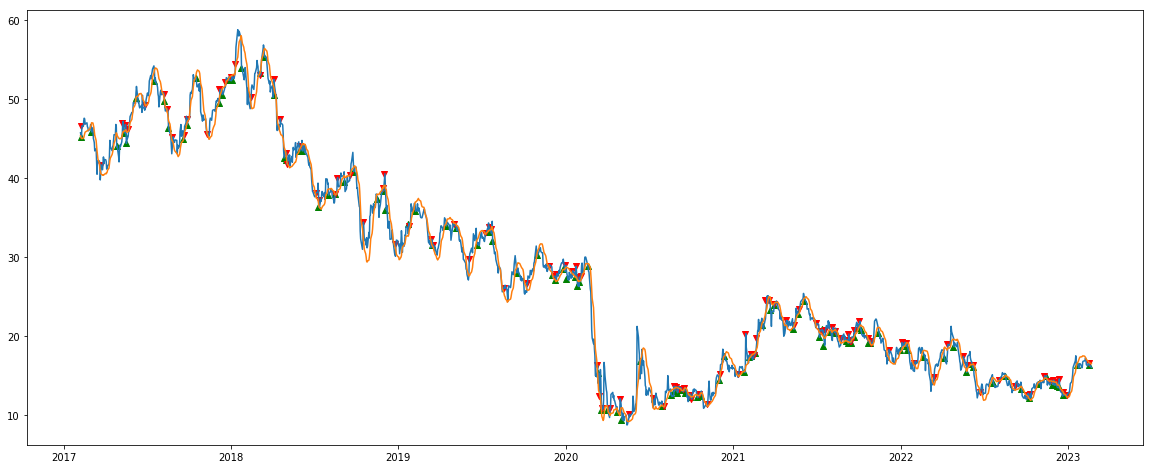

In [39]:
plt.figure(figsize=(20,8))
plt.plot(all_df[['Open','LSMA']])
plt.scatter(buydates,all_df.loc[buydates].shifted_open,marker='^',color='green')
plt.scatter(selldates,all_df.loc[selldates].shifted_open,marker='v',color='red')

In [40]:
(profit>0).value_counts()

True     72
False    45
dtype: int64

In [42]:
72/(72+45)

0.6153846153846154

In [43]:
sum([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])

-0.6995099725985172

In [44]:
profit.sum()

-0.6995099725985168